# Credit Card Fraud Detection

Here, I will be using two popular classification models to recognize fraudulent credit card transactions. These models are: Decision Tree and Support Vector Machine. I will use a real dataset to train each of these models. The public dataset includes information about transactions made by credit cards in September 2013 by European cardholders. I will use the trained model to assess if a credit card transaction is legitimate or not.

In the current session, I will be utilizing not only the Scikit-Learn Python interface, but also the Python API offered by the Snap Machine Learning (Snap ML) library. Snap ML is a high-performance IBM library for ML modeling. It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. Snap ML not only accelerates ML algorithms through system awareness, but it also offers novel ML algorithms with best-in-class accuracy. For more information, please visit [snapml](https://ibm.biz/BdPfxy?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2022-01-01) information page.

### Introduction
Imagine that I work for a financial institution and part of my job is to build a model that predicts if a credit card transaction is fraudulent or not. I can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).

I have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically I have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).

To train the model I can use part of the input dataset and the remaining data can be used to assess the quality of the trained model. First, let's download the dataset.

#### Downloading the datasets from Kaggle

In [2]:
import opendatasets as od
od.download('https://www.kaggle.com/mlg-ulb/creditcardfraud')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  wisdomadike


Your Kaggle Key:

  ········


100%|█████████████████████████████████████| 66.0M/66.0M [00:12<00:00, 5.62MB/s]


#### Importing the neccessary libraries

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

#### Analyzing the Data
Lets read the downloaded Kaggle datasets and reads it into a Pandas DataFrame

In [2]:
data = pd.read_csv('creditcardfraud/creditcard.csv')
print('We have ' + str(len(data)) + ' observations in the data')
print('We have ' + str(len(data.columns)) + ' variables in the data')
data.head()

We have 284807 observations in the data
We have 31 variables in the data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.

In [3]:
n = 10
big_data = pd.DataFrame(np.repeat(data.values, n, axis=0), columns=data.columns)
print('We have ' + str(len(big_data)) + ' observations in the data')
print('We have ' + str(len(big_data.columns)) + ' variables in the data')
big_data.head()

We have 2848070 observations in the data
We have 31 variables in the data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. My objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.

In [4]:
# Get the set of unique Class variable
labels = big_data['Class'].unique()
labels

array([0., 1.])

In [5]:
# Get the count of each Class variable
counts = big_data['Class'].value_counts().values
counts

array([2843150,    4920], dtype=int64)

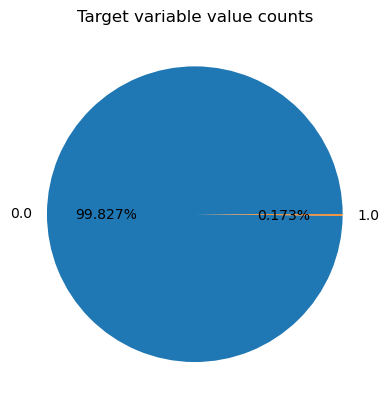

In [6]:
# Lets plot the Class value counts
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.3f%%')
ax.set_title('Target variable value counts')
plt.show()

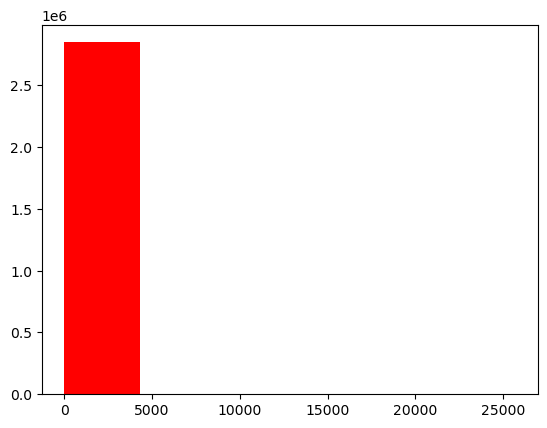

The minimum value:  0.0
The maximum value:  25691.16
The 90th percentile:  203.0


In [7]:
# Lets plot 90th percentile of the amount values using Histogram
plt.hist(big_data['Amount'].values, 6, histtype='bar', facecolor='r')
plt.show()

print('The minimum value: ', np.min(big_data['Amount'].values))
print('The maximum value: ', np.max(big_data['Amount'].values))
print('The 90th percentile: ', np.percentile(big_data['Amount'].values, 90))

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.

#### Data Preprocessing
Lets prepare the data for training. Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence

In [8]:
# standardize features by removing the mean and scaling to unit variance
big_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_data.iloc[:, 1:30])
data_matrix = big_data.values
data_matrix

array([[ 0.00000000e+00, -6.94242321e-01, -4.40749246e-02, ...,
        -6.37811507e-02,  2.44964263e-01,  0.00000000e+00],
       [ 0.00000000e+00, -6.94242321e-01, -4.40749246e-02, ...,
        -6.37811507e-02,  2.44964263e-01,  0.00000000e+00],
       [ 0.00000000e+00, -6.94242321e-01, -4.40749246e-02, ...,
        -6.37811507e-02,  2.44964263e-01,  0.00000000e+00],
       ...,
       [ 1.72792000e+05, -2.72330934e-01, -1.14898979e-01, ...,
         4.13499858e-02,  5.14355311e-01,  0.00000000e+00],
       [ 1.72792000e+05, -2.72330934e-01, -1.14898979e-01, ...,
         4.13499858e-02,  5.14355311e-01,  0.00000000e+00],
       [ 1.72792000e+05, -2.72330934e-01, -1.14898979e-01, ...,
         4.13499858e-02,  5.14355311e-01,  0.00000000e+00]])

In [9]:
# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]
X

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       ...,
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [10]:
# y: Labels vector
y = data_matrix[:, 30]
y[0:5]

array([0., 0., 0., 0., 0.])

In [11]:
# Data Normalization
X = normalize(X, norm='l1')
X

array([[-0.05617142, -0.00356612,  0.13534477, ...,  0.02677257,
        -0.00516056,  0.01982016],
       [-0.05617142, -0.00356612,  0.13534477, ...,  0.02677257,
        -0.00516056,  0.01982016],
       [-0.05617142, -0.00356612,  0.13534477, ...,  0.02677257,
        -0.00516056,  0.01982016],
       ...,
       [-0.02071875, -0.00874144,  0.03529059, ..., -0.00045525,
         0.00314588,  0.03913181],
       [-0.02071875, -0.00874144,  0.03529059, ..., -0.00045525,
         0.00314588,  0.03913181],
       [-0.02071875, -0.00874144,  0.03529059, ..., -0.00045525,
         0.00314588,  0.03913181]])

In [12]:
# print the shape of the features matrix and the labels vector
print('X.shape: ', X.shape)
print('y.shape: ', y.shape)

X.shape:  (2848070, 29)
y.shape:  (2848070,)


### Dataset Train/Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (1993649, 29) (1993649,)
Testing set:  (854421, 29) (854421,)


### Model built with Decision Tree Classifier from Scikit-Learn

In [14]:
# compute the sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)
w_train

array([0.50086524, 0.50086524, 0.50086524, ..., 0.50086524, 0.50086524,
       0.50086524])

In [16]:
# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

In [17]:
# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)
sklearn_dt

DecisionTreeClassifier(max_depth=4, random_state=35)

In [18]:
# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("Sklearn Training time (s): {0:.5f}".format(sklearn_time))

Sklearn Training time (s): 97.47496


### Model built with Decision Tree Classifier from Snap ML
If not already computed, we would have computed the sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset __w_train = compute_sample_weight('balanced', y_train)__

In [19]:
# import the Decision Tree Classifier Model from Snap ML
from snapml import DecisionTreeClassifier

Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn to use the GPU, we will set the use_gpu parameter to True __snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)__

To set the number of CPU threads used at training time, set the n_jobs parameter for reproducible output across multiple function calls, set random_state to a given integer value.

In [36]:
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)
snapml_dt

DecisionTreeClassifier(max_depth=4, n_jobs=4, random_state=45)

In [37]:
# Train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  22.28340


### Evaluate the Scikit-Learn and Snap ML Decision Tree Classifier Models

In [38]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print("[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup: {0:.2f}x".format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup: 6.40x


Running inference and computing the probabilities of the test samples to belong to the class of fraudulent transactions

In [39]:
sklearn_prediction = sklearn_dt.predict_proba(X_test)[:,1]
sklearn_prediction

array([0.03947781, 0.09088916, 0.03947781, ..., 0.03947781, 0.03947781,
       0.03947781])

I will evaluate the Compute Area Under the "Receiver Operating Characteristic Curve (ROC-AUC) score" from the predictions

In [40]:
sklearn_roc_auc_score = roc_auc_score(y_test, sklearn_prediction)
print('[Sklearn Roc-AUC Score]: {0:.3f}'.format(sklearn_roc_auc_score))

[Sklearn Roc-AUC Score]: 0.966


The same process goes to SnapML

Running inference and computing the probabilities of the test samples to belong to the class of fraudulent transactions

In [25]:
snapml_prediction = snapml_dt.predict_proba(X_test)[:,1]
snapml_prediction

array([0.03965165, 0.09108091, 0.03965165, ..., 0.03965165, 0.03965165,
       0.03965165])

I will also evaluate the Compute Area Under the "Receiver Operating Characteristic Curve (ROC-AUC) score" from the predictions

In [26]:
snapml_roc_auc_score = roc_auc_score(y_test, snapml_prediction)
print('[Snap ML Roc-AUC Score]: {0:.3f}'.format(snapml_roc_auc_score))

[Snap ML Roc-AUC Score]: 0.966


As shown above both decision tree models provide the same score on the test dataset. However Snap ML runs the training routine 12x faster than Scikit-Learn. This is one of the advantages of using Snap ML: acceleration of training of classical machine learning models, such as linear and tree-based models.

#### Support Vector Machine model with Scikit-Learn

In [27]:
# import the linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

We will instatiate a scikit-learn SVM model to indicate the class imbalance at fit time, set class_weight='balanced' for reproducible output across multiple function calls, set random_state to a given integer value

In [28]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=23, loss='hinge', fit_intercept=False)
sklearn_svm

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=23)

In [29]:
# Train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  142.59


#### Support Vector Machine model with Snap ML

In [30]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

In contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs to use the GPU, we will set the use_gpu parameter to True __snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=13, use_gpu=True, fit_intercept=False)__ to set the number of threads used at training time, one needs to set the n_jobs parameter

In [42]:
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=13, n_jobs=4, fit_intercept=False)
print(snapml_svm.get_params())

{'class_weight': 'balanced', 'device_ids': [], 'fit_intercept': False, 'gamma': 1.0, 'generate_training_history': None, 'intercept_scaling': 1.0, 'kernel': 'linear', 'loss': 'hinge', 'max_iter': 1000, 'n_components': 100, 'n_jobs': 4, 'normalize': False, 'random_state': 13, 'regularizer': 1.0, 'tol': 0.001, 'use_gpu': False, 'verbose': False}


In [43]:
# Train an SVM model using Snap ML
t0 = time.time()
snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  40.20


#### Evaluating the Scikit-Learn and Snap ML Support Vector Machine Models

In [44]:
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs Scikit-Learn for training speedup: {0:.2f}s'.format(training_speedup))

[Support Vector Machine] Snap ML vs Scikit-Learn for training speedup: 3.55s


We will run the inference using the Scikit-Learn model and get the confidence scores for the test samples

In [45]:
sklearn_prediction = sklearn_svm.decision_function(X_test)
sklearn_prediction

array([-1.00227357, -0.56535512, -1.65572175, ..., -1.40930771,
       -1.403565  , -0.95377213])

In [46]:
# Evaluating accuracy on test set
acc_sklearn = roc_auc_score(y_test, sklearn_prediction)
print('[Scikit-Learn] ROC-AUC score using SVM : {0:.3f}'.format(acc_sklearn))

[Scikit-Learn] ROC-AUC score using SVM : 0.984


Also run the inference on Snap ML model and get the confidence scores for the test sample

In [47]:
snapml_prediction = snapml_svm.decision_function(X_test)
snapml_prediction

array([-0.95144435, -0.56278124, -1.62816215, ..., -1.38340143,
       -1.44724802, -0.95617919])

In [48]:
# Evaluating accuracy on test set
acc_snapml = roc_auc_score(y_test, snapml_prediction)
print('[Snap ML] ROC-AUC score using SVM : {0:.3f}'.format(acc_snapml))

[Snap ML] ROC-AUC score using SVM : 0.985
